# Astronomy Packages

This notebook installs and demonstrates a range of Python packages that can be used to enrich materials relating to astronomy subjects in a reproducible way.

The notebook should install required packages if they are not available.

Ideally, these packages would be preinstalled in a computing environment delivered to module teams, students or researchers so that they could be called on directly without any further installation requirements.


Note that some of the interactive diagrams will only be rendered correctly when running the live notebook.

## `astropy`

The `astropy` package provides a range of tools for working with astronomical image files.

Examples taken from:

http://eso-python.github.io/ESOPythonTutorials/FITS-images.html

In [3]:
%%capture
try:
    from astropy.io import fits
except:
    !conda install -y -c astropy astropy 

If we know the URL of a FITS file, we can download it and then perform a range of file operations, such as:

- save the file
- display the image

In [2]:
from astropy.utils.data import download_file
from astropy.io import fits

horsehead_url = 'http://data.astropy.org/tutorials/FITS-images/HorseHead.fits'

#image_file is the path the downloaded and locally stashed file
image_file = download_file(horsehead_url, cache=True )
image_file

'/home/nbuser/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f'

In [3]:
hdu_list = fits.open(image_file)
#hdu_list.info()

#save file under another name in the local directory: hh.fits
hdu_list.writeto('hh.fits')

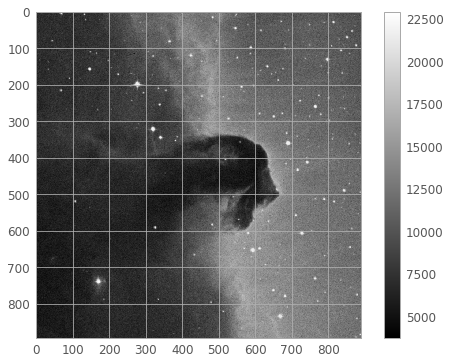

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt

#Nice styling
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)


image_data = fits.getdata('hh.fits')

#Display the image
plt.imshow(image_data, cmap='gray')
plt.colorbar();

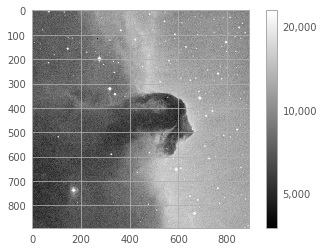

In [5]:
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap='gray', norm=LogNorm())

cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000']);

## `aplypy`

`aplypy`, the [*Astronomical Plotting Library in Python*](https://aplpy.github.io/), is a Python module aimed at producing publication-quality plots of astronomical imaging data in FITS format.

In [1]:
%%capture
try:
    import aplpy
except:
    !conda install -y -c astropy aplpy 

In [7]:
%matplotlib inline 
import aplpy

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


INFO: Auto-setting vmin to  3.634e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.940e+04 [aplpy.core]


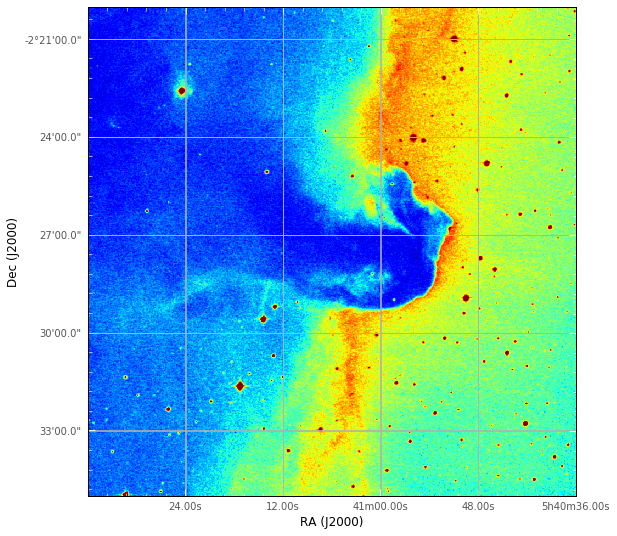

In [8]:
hh = aplpy.FITSFigure('hh.fits')
hh.show_colorscale()

INFO: Auto-setting vmin to  3.634e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.940e+04 [aplpy.core]


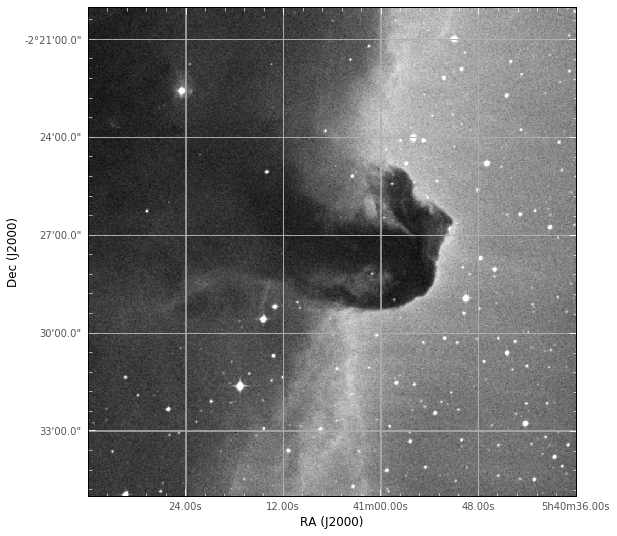

In [9]:
hh.close()
hh = aplpy.FITSFigure('hh.fits')
hh.show_grayscale()

In [10]:
hh.close()

In [11]:
hh.show_markers?

INFO: Auto-setting vmin to  3.634e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.940e+04 [aplpy.core]


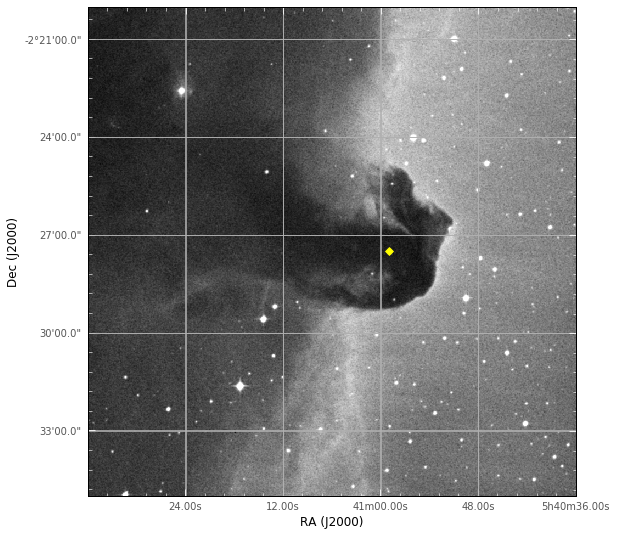

In [24]:
from astropy import coordinates

hh = aplpy.FITSFigure('hh.fits')
hh.show_grayscale()

# Can use world coordinates directly
horsehead = coordinates.SkyCoord.from_name('Horsehead Nebula')
hh.show_markers(horsehead.ra.deg, horsehead.dec.deg, marker='D', c='yellow')

In [26]:
horsehead.ra.deg, horsehead.dec.deg

(85.24583, -2.45833)

In [13]:
hh.close()

## `astroquery`

Library for querying various databases for astronomical data and astronomical image files.

In [14]:
%%capture
try:
    from astroquery.skyview import SkyView
except:
    !conda install -y -c astropy astroquery

In [15]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("Horsehead nebula")
result_table.to_pandas().T

0
MAIN_ID         b'NAME Horsehead Nebula'
RA                            05 40 59.0
DEC                            -02 27 30
RA_PREC                                5
DEC_PREC                               5
COO_ERR_MAJA                         NaN
COO_ERR_MINA                         NaN
COO_ERR_ANGLE                          0
COO_QUAL                               D
COO_WAVELENGTH                          
COO_BIBCODE                          b''

In [16]:
from astroquery.skyview import SkyView
hh2_images = SkyView.get_images(position='Horsehead Nebula', survey=['2MASS-K'], pixels=1500)
hh2_images

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fc30486b2b0>]]

In [17]:
hh2_images[0].writeto('hh2.fits')

INFO: Auto-setting vmin to  5.163e+02 [aplpy.core]
INFO: Auto-setting vmax to  5.495e+02 [aplpy.core]


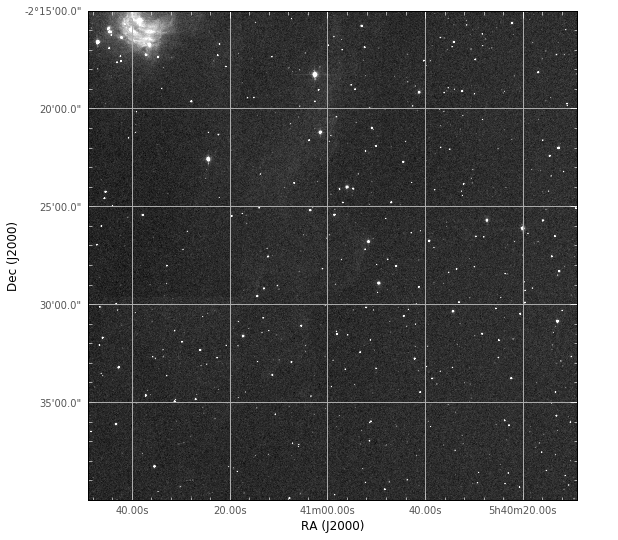

In [18]:
hh2 = aplpy.FITSFigure('hh2.fits')
hh2.show_grayscale()

In [19]:
hh2.close()

## `pyhorizon`

Wrapper for NASA API [[docs]](https://github.com/EricDalrymple91/pyhorizon).

In [ ]:
try:
    from pyhorizon import Horizon
except:
    !pip install --no-cache pyhorizon

In [21]:
from pyhorizon import Horizon

apollo = Horizon()

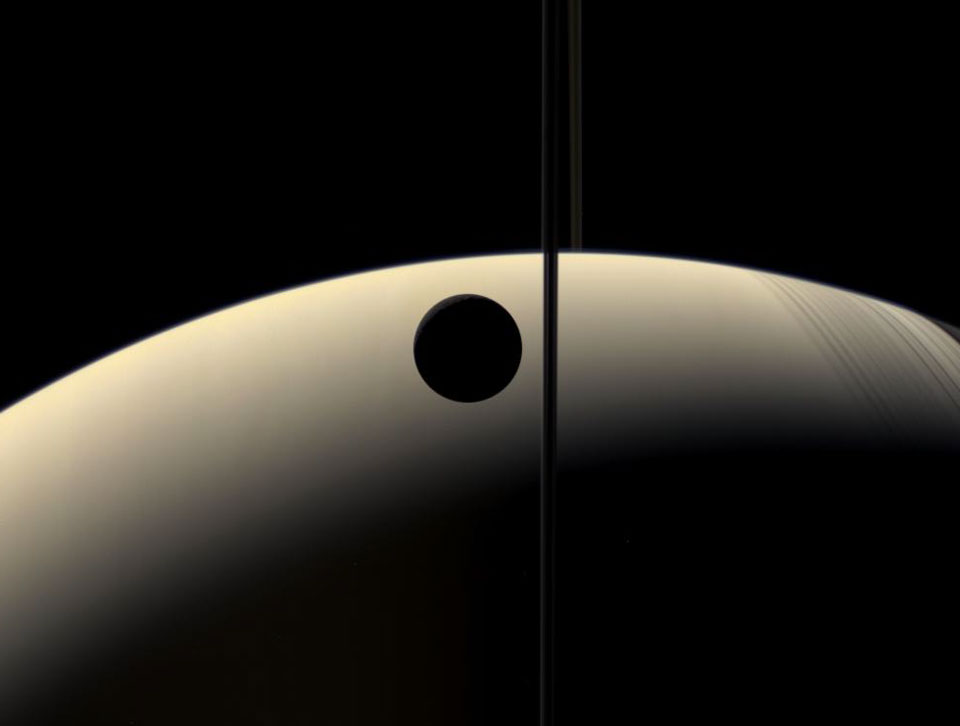

In [22]:
#Astronomy picture of the day

from IPython.display import Image

apod=apollo.apod(date='2015-01-04', hd=False)
Image(apod['url'])

{'img_src': 'http://mars.nasa.gov/mer/gallery/all/1/n/1000/1N216958451EFF76ZFP1950L0M1-BR.JPG', 'rover': {'launch_date': '2003-07-07', 'max_date': '2018-06-11', 'max_sol': 5111, 'name': 'Opportunity', 'cameras': [{'full_name': 'Front Hazard Avoidance Camera', 'name': 'FHAZ'}, {'full_name': 'Navigation Camera', 'name': 'NAVCAM'}, {'full_name': 'Panoramic Camera', 'name': 'PANCAM'}, {'full_name': 'Miniature Thermal Emission Spectrometer (Mini-TES)', 'name': 'MINITES'}, {'full_name': 'Entry, Descent, and Landing Camera', 'name': 'ENTRY'}, {'full_name': 'Rear Hazard Avoidance Camera', 'name': 'RHAZ'}], 'total_photos': 198439, 'status': 'active', 'id': 6, 'landing_date': '2004-01-25'}, 'earth_date': '2006-11-17', 'camera': {'full_name': 'Navigation Camera', 'name': 'NAVCAM', 'rover_id': 6, 'id': 16}, 'sol': 1000, 'id': 141044}


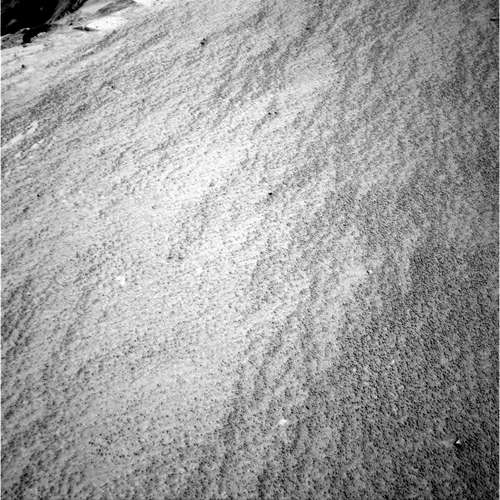

In [23]:
#Mars Rover
mars_images = apollo.martian_sol('opportunity', 1000, camera='NAVCAM', page=1)

#Grab the first image in the returned list
mars_image = mars_images['photos'][0]
mars_image_url=mars_image['img_src']

#Print metadata
print(mars_image)

#Display image
Image(mars_image_url)

## `poliastro`

`poliastro` is a package that can be used to support a wide range of astrodynamics based activities.

In [ ]:
#%%capture
try:
    import poliastro
except:
    !pip install --no-cache --upgrade numpy scipy git+https://github.com/poliastro/poliastro.git 

In [75]:
from poliastro.bodies import Earth, Mars, Venus, Sun
from poliastro.examples import iss

from poliastro.twobody import Orbit

from poliastro.plotting import OrbitPlotter, OrbitPlotter3D, plot

from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

In [3]:
from astropy import units as u

In [4]:
#via https://docs.poliastro.space/en/latest/user_guide.html

## Data from Curtis, example 4.3
#Position vector
r = [-6045, -3490, 2500] * u.km
#Speed vector
v = [-3.457, 6.618, 2.533] * u.km / u.s

#Calculate orbit
ss = Orbit.from_vectors(Earth, r, v)

ss, ss.epoch.iso


(7283 x 10293 km x 153.2 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT),
 '2000-01-01 12:00:00.000')

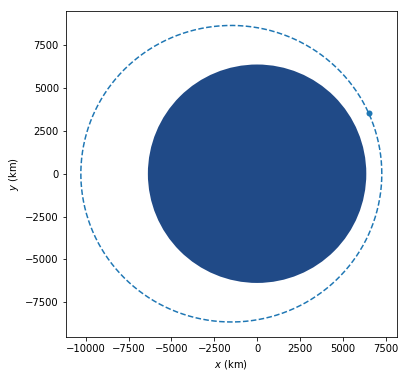

In [7]:
plot(ss);

We can do 3D plots too...

In [91]:
frame1 = OrbitPlotter3D()

frame1.plot(Orbit.from_body_ephem(Earth), label=Earth)
frame1.plot(Orbit.from_body_ephem(Mars), label=Mars)
frame1.plot(Orbit.from_body_ephem(Venus), label=Venus)

frame1.show(title="A bit of the solar system...")

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/poliastro/twobody/orbit.py:494: UserWarning:

Frame <class 'astropy.coordinates.builtin_frames.icrs.ICRS'> does not support 'obstime', time values were not returned



In [110]:
#In the static preview notebook, it seems that the same 3D chart is rendered each time?

frame2 = OrbitPlotter3D()

frame2.plot(iss,label='iss')
frame2.show(title="ISS")

`poliastro` includes a package ([NEOS](https://docs.poliastro.space/en/latest/examples/Using%20NEOS%20package.html)) that makes it easy to query the NASA [NeOWS API](https://api.nasa.gov/api.html#NeoWS) to retrieve data about near-Earth asteroids:

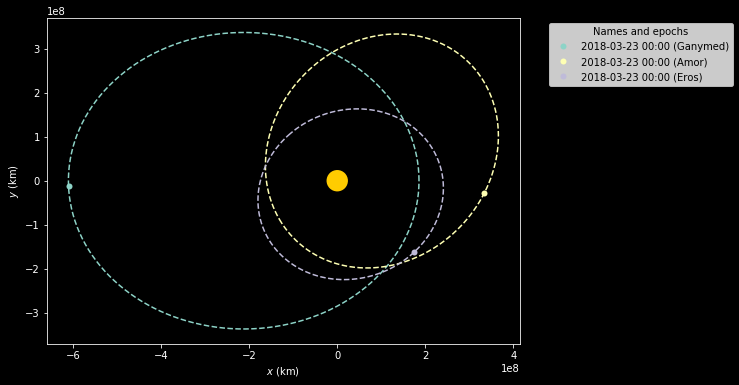

In [100]:
from poliastro.neos import neows

ganymed = neows.orbit_from_name('1036') # Ganymed IAU number
amor = neows.orbit_from_name('2001221') # Amor SPK-ID
eros = neows.orbit_from_spk_id('2000433') # Eros SPK-ID

#Play with the style and use a dark background
frame = OrbitPlotter(dark=True)

#frame.plot(halley, label='Halley')
frame.plot(ganymed, label='Ganymed')
frame.plot(amor, label='Amor')
frame.plot(eros, label='Eros');

In [118]:
frame3 = OrbitPlotter3D()

#frame.plot(halley, label='Halley')
frame3.plot(ganymed, label='Ganymed')
frame3.plot(amor, label='Amor')
frame3.plot(eros, label='Eros')

frame3.show(title="Near Earth Objects...")

One of the useful things about the 3D plots is that you can interactively rotate the diagram in three dimensions and then use the diagram's camera control to grab a static png image of the chart in that particular orientation.

Other data sources are also available via `poliastro`. For example, [DASTCOM5](http://adsabs.harvard.edu/abs/2014DPS....4641407G), "*a portable and current database of asteroid and comet orbit solutions*":

In [ ]:
from poliastro.neos import dastcom5

#Download a 250MB data file
dastcom5.download_dastcom5()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/poliastro/twobody/orbit.py:494: UserWarning:

Frame <class 'astropy.coordinates.builtin_frames.icrs.ICRS'> does not support 'obstime', time values were not returned



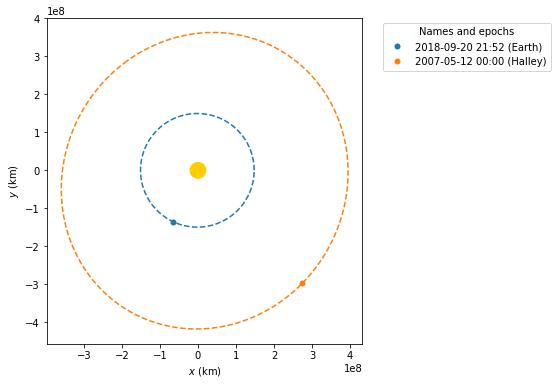

In [29]:
halley = dastcom5.orbit_from_name('halley')[0]
earth_orbit =  Orbit.from_body_ephem(Earth)

frame=OrbitPlotter()
frame.plot(earth_orbit,label="Earth")
frame.plot(halley,label="Halley");

If you know what certain things mean (like a *Hohmann transfer*), you can plot some clever things...

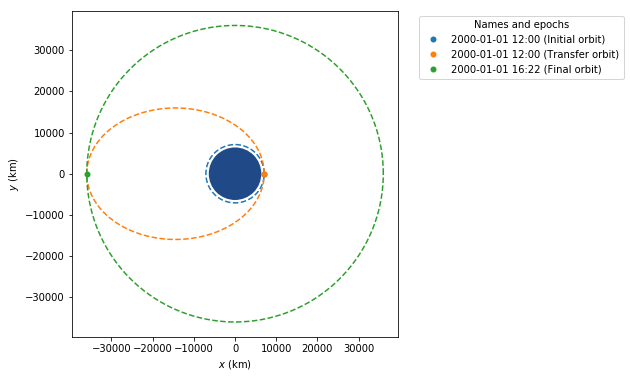

In [45]:
from astropy import time
from astropy import units as u
from poliastro.maneuver import Maneuver

#Original orbit
ss_i = Orbit.circular(Earth, alt=700 * u.km)

#Pass in an inital orbit and the radius of a final orbit
hoh = Maneuver.hohmann(ss_i, 36000 * u.km)

op = OrbitPlotter()

#Apply the maneuver and return the transfer orbit as well as the final orbit
ss_a, ss_f = ss_i.apply_maneuver(hoh, intermediate=True)
op.plot(ss_i, label="Initial orbit")
op.plot(ss_a, label="Transfer orbit")
op.plot(ss_f, label="Final orbit");

In [65]:
for (t,i) in hoh.impulses:
    print('At time {} apply delta {}'.format(t,i))

At time 0.0 s apply delta [   0.        2197.3992373    0.       ] m / s
At time 15729.733147123983 s apply delta [   -0.         -1420.00066617    -0.        ] m / s


In [57]:
hoh.get_total_cost()

<Quantity 3.6173999 km / s>

In [58]:
hoh.get_total_time()

<Quantity 15729.73314712 s>

Alternatively, try a bielliptic transfer:

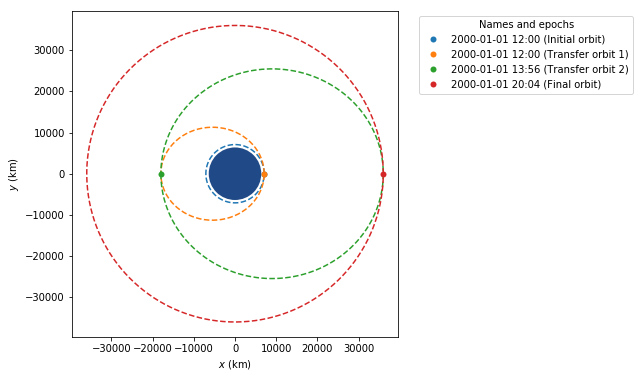

In [72]:
biell = Maneuver.bielliptic(ss_i, 18000 * u.km, 36000 * u.km)

op = OrbitPlotter()

#Apply the maneuver and return the transfer orbit as well as the final orbit
ss_a, ss_b, ss_f = ss_i.apply_maneuver(biell, intermediate=True)
op.plot(ss_i, label="Initial orbit")
op.plot(ss_a, label="Transfer orbit 1")
op.plot(ss_b, label="Transfer orbit 2")
op.plot(ss_f, label="Final orbit");

To show the actual route taken, (i.e. the parts of the transfer orbit allow followed) see e.g. https://github.com/poliastro/poliastro/blob/master/docs/source/examples/Going%20to%20Mars%20with%20Python%20using%20poliastro.ipynb which produces something akin to the *MSL Mission: From Earth to Mars* at the bottom of http://docs.poliastro.space/en/latest/user_guide.html#more-advanced-plotting-orbitplotter-objects.

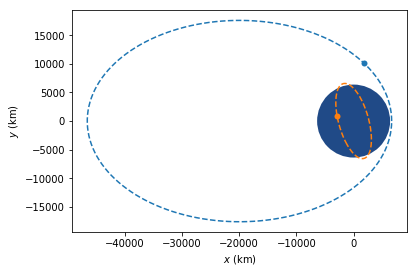

In [5]:
#https://github.com/aeronau/poliastro-examples/blob/master/orbits.ipynb
from poliastro.examples import iss, molniya
from poliastro.plotting import plot, OrbitPlotter

frame = OrbitPlotter()
frame.plot(molniya)
frame.plot(iss);

## `pyephem`

[pyephem](http://rhodesmill.org/pyephem/) is a Python package that supports basic astronomical computations.

> Given a date and location on the Earth’s surface, it can compute the positions of the Sun and Moon, of the planets and their moons, and of any asteroids, comets, or earth satellites whose orbital elements the user can provide. Additional functions are provided to compute the angular separation between two objects in the sky, to determine the constellation in which an object lies, and to find the times at which an object rises, transits, and sets on a particular day.

Examples based on: http://nbviewer.jupyter.org/url/www.sc.eso.org/~bdias/pycoffee/codes/20160908/pyephemexamples.ipynb

See also [`pysolar`](https://pysolar.readthedocs.io/en/latest/#examples) for calculating the intensity of solar radiation at different points of the Earth for particular datetimes.

In [5]:
%%capture
try:
    import ephem
except:
    !pip install --no-cache pyephem

In [6]:
%matplotlib inline
import ephem
import numpy as np

#Define an observer
obs = ephem.city('London')

#Get current time
ephem.localtime(obs.date).strftime("%Y-%m-%d %H:%M")

'2018-09-21 11:50'

In [11]:
#Next sunset and sunrise
sol = ephem.Sun()
obs.horizon = '-18'
sol.compute(obs)
print(obs.next_setting(sol, use_center=True))
print(obs.next_rising(sol, use_center=True))


2018/9/21 19:55:20
2018/9/22 03:52:14


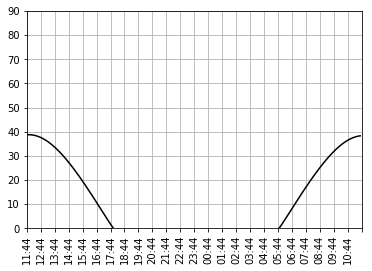

In [14]:
#Plotting the altitude over 24

#This sort of things could be easily reworked as the basis of an exercise
#  where students plot the altitude of various bodies relative to various
#  locations on various dates
#It could then provide the basis for a sweep where you try to optimise
#  something about the altitude from a particular location over a range of dates?
import matplotlib.pyplot as plt

def plotAltitude(obs, obj):
    resolution = 0.1
    datelist = [ephem.date(obs.date + x*ephem.hour) for x in np.arange(0,24,resolution)]
    positions = [0]*len(datelist)
    
    for i in range(len(datelist)):
        obs.date = datelist[i]
        obj.compute(obs)
        positions[i] = obj.alt*(180./3.1415)

    plt.plot(np.arange(0,24,resolution),positions,'-k')
    plt.gca().set_ylim(0,90)
    plt.gca().set_xlim(0,24)
    plt.xticks(np.arange(0,25),rotation='vertical')
    plt.gca().set_xticklabels([ephem.localtime(d).strftime("%H:%M") for d in datelist][::int(1/resolution)])
    plt.grid()
    plt.show()
    
plotAltitude(obs, sol)

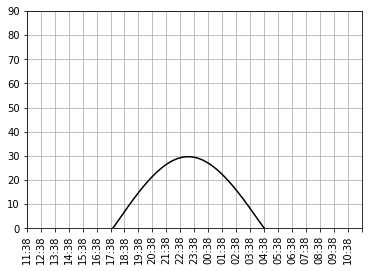

In [15]:
moon = ephem.Moon()
plotAltitude(obs, moon)

In [ ]:
#planet spotting...
#http://shallowsky.com/blog/science/astro/predicting-planet-visibility.html
#conjunctions http://shallowsky.com/blog/science/astro/predicting-conjunctions.html

### Plotting Constellations

Plough example based on: https://github.com/skyfielders/astronomy-notebooks/blob/master/Plot.ipynb

In [17]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
import numpy as np
import math

In [18]:
#Use pyephem to get the stars of the big dipper
names = ['Dubhe', 'Merak', 'Phecda', 'Megrez',
         'Alioth', 'Mizar', 'Alcor', 'Alcaid',]
stars = [ephem.star(name) for name in names]

In [57]:
%%capture
try:
    from mpl_toolkits.basemap import Basemap
except:
    #This seems temperamental to install, maybe based on Azure notebook load?!
    #If we try to install basemap directly, it sometines gets stuck...
    #In such cases, giving it a hand by updating bits of conda seems to help
    #albeit at the expense of having to wait a couple of minutes to solve
    # the environment for each update
    #!conda update -y setuptools
    #!conda update -y conda
    !conda install -y -c conda-forge basemap

#Hack to fix missing PROJ4 env var error raised when loading Basemap
# ish via https://github.com/conda-forge/basemap-feedstock/issues/30
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [38]:
from mpl_toolkits.basemap import Basemap

In [39]:
#Use pyephem to plot the big dipper
def dipper_radec(year, epoch):
    for star in stars:
        star.compute(str(year), str(epoch))
    ra = [-math.degrees(star.a_ra) for star in stars]
    dec = [math.degrees(star.a_dec) for star in stars]
    return ra, dec

#Use interact to show the evolution of the big dipper over large time scale (powered by pyEphem)
@interact_manual(year=(-100000,100000,5000), epoch=(-2000,4000,1000),
         projection=['cyl','aeqd','laea','merc','stere','ortho', 'robin', 'gnom'])
def plot_dipper(year=30000, epoch=1000, projection='aeqd'):
    ra, dec = dipper_radec(year, epoch)
    width = 4000000
    m = Basemap(width=width, height=width, projection=projection,
                lat_0=dec[3], lon_0=ra[3])
    m.drawparallels(np.arange(-80,81,10))
    m.drawmeridians(np.arange(-180,180,10))
    x, y = m(ra, dec)
    m.plot(x, y, marker='o', linestyle='--', color='b')
    plt.title('date={} epoch={}'.format(year,epoch))

interactive(children=(IntSlider(value=30000, description='year', max=100000, min=-100000, step=5000), IntSlide…

## Comet watching...

Via https://ocefpaf.github.io/python4oceanographers/blog/2013/10/28/comet-ison/


In [21]:
import ephem
import numpy as np
import matplotlib.pyplot as plt

#Is there a tool that can make it easier to create this sort of string?
ISON = "C/2012 S1 (ISON),h,11/28.7744/2013,62.3994,295.6528,345.5644,1.000002,0.012444,2000,7.5,3.2"
comet = ephem.readdb(ISON)
print(comet)

<ephem.HyperbolicBody 'C/2012 S1 (ISON)' at 0x7fdb66db32f0>


In [22]:
from pandas import DataFrame, date_range

days = date_range(start='2013/10/28', end='2013/12/31', freq='D')

earth_d, sun_d = [], [] 
for day in days:
    comet.compute(day)
    earth_d.append(comet.earth_distance)
    sun_d.append(comet.sun_distance)
    
df = DataFrame(np.c_[earth_d, sun_d], index=days, columns=['Earth', 'Sun'])

from scipy import constants
conversion = constants.au * 1e-3
df['Sun km'] = df['Sun'] * conversion
df['Earth km'] = df['Earth'] * conversion

df.head(5)

Earth       Sun        Sun km      Earth km
2013-10-28  1.343978  1.091559  1.632950e+08  2.010563e+08
2013-10-29  1.315059  1.068280  1.598124e+08  1.967301e+08
2013-10-30  1.286399  1.044747  1.562919e+08  1.924426e+08
2013-10-31  1.258032  1.020949  1.527318e+08  1.881990e+08
2013-11-01  1.229998  0.996874  1.491302e+08  1.840051e+08

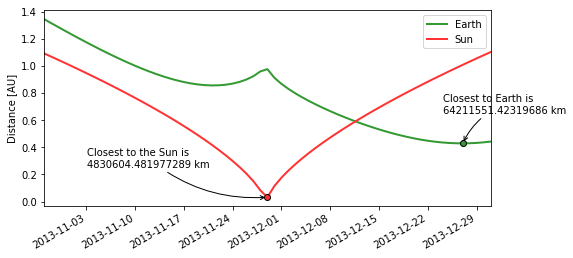

In [23]:
kw = dict(markeredgecolor='k', marker='o', linestyle='none')
arrowprops = dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='k')

fig, ax = plt.subplots(figsize=(8, 4))
sx, sy, sm = df['Sun'].argmin(), df['Sun'].min(), df['Sun km'].min()
ex, ey, em = df['Earth'].argmin(), df['Earth'].min(), df['Earth km'].min()

ax.plot(ex, ey, markerfacecolor='#339933', **kw)
ax.plot(sx, sy, markerfacecolor='#ff3333', **kw)

ax.annotate('Closest to Earth is\n%s km' % em,
            xy=(ex, ey), xycoords='data',
            xytext=(-20, 30), textcoords='offset points', arrowprops=arrowprops)

ax.annotate('Closest to the Sun is\n%s km' % sm,
            xy=(sx, sy), xycoords='data',
            xytext=(-180, 30), textcoords='offset points', arrowprops=arrowprops)

ax = df[['Earth', 'Sun']].plot(ax=ax, zorder=0, color=['#339933', '#ff3333'], linewidth=2)
_ = ax.set_ylabel('Distance [AU]')


In [24]:
#closest to Earth
obs = ephem.Observer()
obs.lon = np.deg2rad(-46.665)
obs.lat = np.deg2rad(-23.473)
obs.date = ex
comet.compute(obs)
print("Date: %s\nRight ascension: %s\nDeclination: %s\nMagnitude: %s" %
      (obs.date, comet.ra, comet.dec, comet.mag))

Date: 2013/12/27 00:00:00
Right ascension: 16:22:39.01
Declination: 52:59:54.6
Magnitude: 5.69


## `sunpy`
[`sunpy`](https://sunpy.org/) is an open-source solar data analysis environment for Python.

In [5]:
%%capture
try:
    import sunpy.map
except:
    !pip install sunpy

In [6]:
from sunpy.data.sample import file_dict as demo_files
image_files = [k for k in demo_files]
print('\n'.join(image_files))

NOAAPREDICT_TIMESERIES
GOES_XRS_TIMESERIES
AIA_335_IMAGE
NOAAINDICES_TIMESERIES
AIA_171_ROLL_IMAGE
AIA_193_CUTOUT04_IMAGE
EVE_TIMESERIES
AIA_193_CUTOUT02_IMAGE
RHESSI_IMAGE
AIA_193_CUTOUT05_IMAGE
CALLISTO_SPECTRUM
RHESSI_TIMESERIES
GBM_TIMESERIES
AIA_193_IMAGE
AIA_1600_IMAGE
AIA_094_IMAGE
SWAP_LEVEL1_IMAGE
AIA_131_IMAGE
LYRA_LEVEL3_TIMESERIES
AIA_193_CUTOUT03_IMAGE
AIA_171_IMAGE
AIA_193_CUTOUT01_IMAGE
NORH_TIMESERIES
AIA_211_IMAGE
EIT_195_IMAGE


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import sunpy.map

def plot_image(imagefile, limb=False, grid=True, colorbar=True):
    ''' Quick function to help display of solar images. '''
    fig = plt.figure()
    
    if imagefile in demo_files:
        m = sunpy.map.Map(demo_files[imagefile])
    else:
        m = sunpy.map.Map(imagefile)
    #ax = plt.subplot(111, projection=m)
    m.plot()
    
    if limb:
        m.draw_limb()
    if grid:
        m.draw_grid()
    if colorbar:
        plt.colorbar()

    plt.title=None
    plt.show()

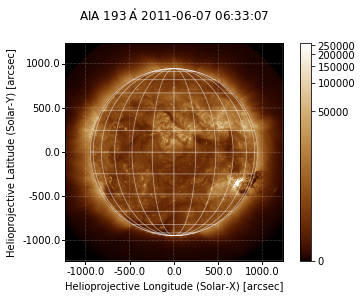

In [8]:
#Render demo image with grid, colourbar etc
plot_image('AIA_193_IMAGE')

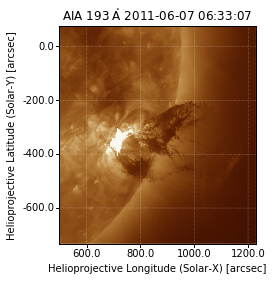

In [28]:
plot_image('AIA_193_CUTOUT01_IMAGE', colorbar=False, grid=False)

In [ ]:
import sunpy.data.sample

#Downloads may take some time
aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

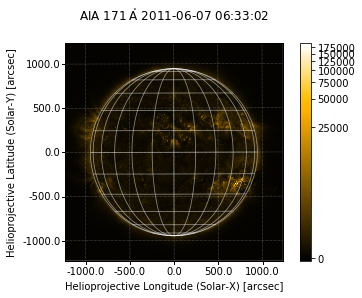

In [25]:
plot_image(aia)

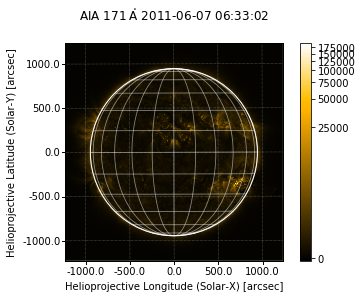

In [26]:
plot_image(aia, limb=True)

See also:

- masking the solar disk: http://docs.sunpy.org/en/stable/generated/gallery/computer_vision_techniques/mask_disk.html#sphx-glr-generated-gallery-computer-vision-techniques-mask-disk-py
- solar cycle time series data: http://docs.sunpy.org/en/stable/generated/gallery/plotting/solar_cycle_example.html#sphx-glr-generated-gallery-plotting-solar-cycle-example-py
- analysis along a great arc: http://docs.sunpy.org/en/stable/generated/gallery/plotting/great_arc_example.html#sphx-glr-generated-gallery-plotting-great-arc-example-py

Other examples:

- https://chrisramsay.co.uk/posts/2017/03/fun-with-the-sun-and-pyephem/ (*Drawing the Analemma, caclulating twilights, etc*)

## `astroplan`

The `astroplan` package helps create astronomical obeservation plans.

This might be useful as part of an activity cosntructed around students planning and making observations from a remote telescope.

Example: https://astroplan.readthedocs.io/en/latest/tutorials/summer_triangle.html

## `Skyfield`

`skyfield` is a Python package that allows you to "*compute positions for the stars, planets, and satellites in orbit around the Earth*".

In [1]:
%%capture
try:
    import skyfield
except:
    !pip install --no-cache --upgrade git+https://github.com/skyfielders/python-skyfield.git

In [49]:
#21/9/18 - this seems to be broken atm?
from skyfield.api import load
ts = load.timescale()

[#################################] 100% deltat.data
[#################################] 100% deltat.preds
[#################################] 100% Leap_Second.dat


In [53]:
#https://github.com/skyfielders/astronomy-notebooks/blob/master/Plot.ipynb
#Code updated from original demo

planets = load('de421.bsp')
earth = planets['earth']

#Now calculate the big dipper using skyfield rather than pyEphem
import skyfield.data.hipparcos

#['Dubhe', 'Merak', 'Phecda', 'Megrez', 'Alioth', 'Mizar', 'Alcor', 'Alkaid',]
dipper_ids = [54061, 53910, 58001, 59774, 62956, 65378, 65477, 67301]
dipper_stars=[skyfield.data.hipparcos.get(str(x)) for x in dipper_ids]

[#################################] 100% de421.bsp


In [ ]:
from mpl_toolkits.basemap import Basemap
def skyfield_dipper(year, projection='aeqd'):
    ra = []
    dec = []
    for star in dipper_stars:
        r,d,z = earth.at(ts.utc(year, 1, 1)).observe(star).radec()
        ra.append(r._degrees)
        dec.append(d.degrees)
    width = 4000000
    m = Basemap(width=width, height=width, projection=projection,
                lat_0=dec[3], lon_0=ra[3])
    m.drawparallels(np.arange(-80,81,10))
    m.drawmeridians(np.arange(-180,180,10))
    x, y = m(ra, dec)
    m.plot(x, y, marker='o', linestyle='--', color='b')
    plt.title('date={} epoch={}'.format(year,'2000'))

In [ ]:
skyfield_dipper(2015)

## To Try

- https://github.com/ussserrr/starmap-northern
- http://adrian.pw/blog/astropy-eclipse/
- https://galpy.readthedocs.io/en/v1.4.0/
- http://phoebe-project.org/2.0/tutorials/animations/
- https://github.com/aeronau/poliastro-examples/blob/master/animate.py (broken?)
- https://github.com/poliastro/poliastro/pull/340 showed promise but closed before completion?

http://python4astronomers.github.io/


Working with satellite imagery: http://pytroll.github.io/

More packages: http://www.astropython.org/packages/

## `orbitalpy`

A high level package for working with orbits. Deprecated? Looks similar to poliastro?

https://pythonhosted.org/OrbitalPy/ [[code](https://github.com/RazerM/orbital)]

Looks like it should support animations, but I couldn't get the animation demos to work in Azure notebooks at least.

In [ ]:
%%capture
try:
    import orbital
except:
    ! pip install orbitalpy

In [10]:
from numpy import radians
from scipy.constants import kilo

import orbital
from orbital import earth, KeplerianElements, Maneuver

In [12]:
from orbital import earth_sidereal_day
o_molniya = KeplerianElements.with_period(
    earth_sidereal_day / 2, e=0.741, i=radians(63.4), arg_pe=radians(270),
    body=earth)

# Simple circular orbit
orbit = KeplerianElements.with_altitude(1000 * kilo, body=earth)

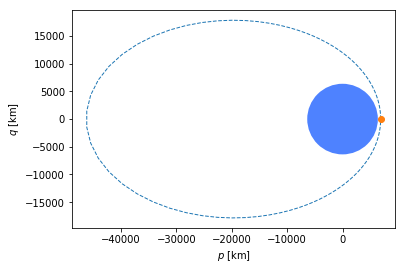

In [13]:
orbital.plot(o_molniya)

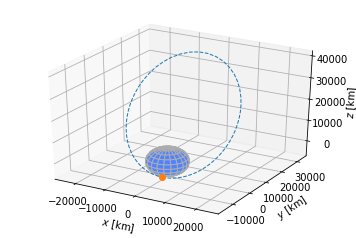

In [14]:
orbital.plot3d(o_molniya)

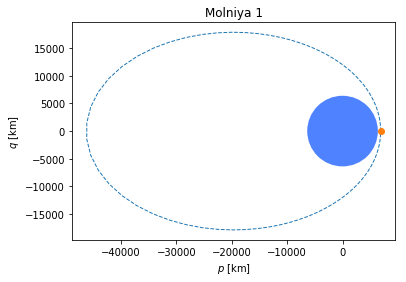

In [16]:
anim = orbital.plot(o_molniya, title='Molniya 1', animate=True) #broken in Azure notebooks?
anim

In [18]:
#from IPython.display import HTML
#HTML(anim.to_html5_video())

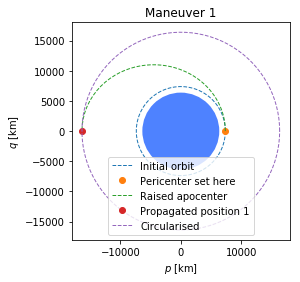

In [21]:
man = Maneuver.hohmann_transfer_to_altitude(10000 * kilo)
orbital.plot(orbit, title='Maneuver 1', maneuver=man)

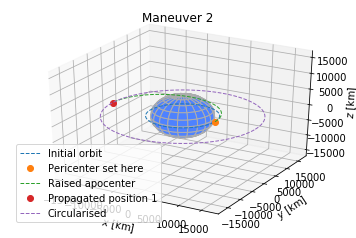

In [22]:
orbital.plot3d(orbit, title='Maneuver 2', maneuver=man)